# RS propagation dev

Investigating nanojets, following Salhi et al. JOSAB 2019
    https://doi.org/10.1364/JOSAB.36.001031

In [1]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import sys
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [2]:
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from matplotlib import pyplot as plt 
import numpy as np 

from scipy.constants import micro, nano, milli

import pyMOE as moe 
from pyMOE.generate import *  
from pyMOE.propagate import * 

## Propagation from a circular aperture

<IPython.core.display.Javascript object>


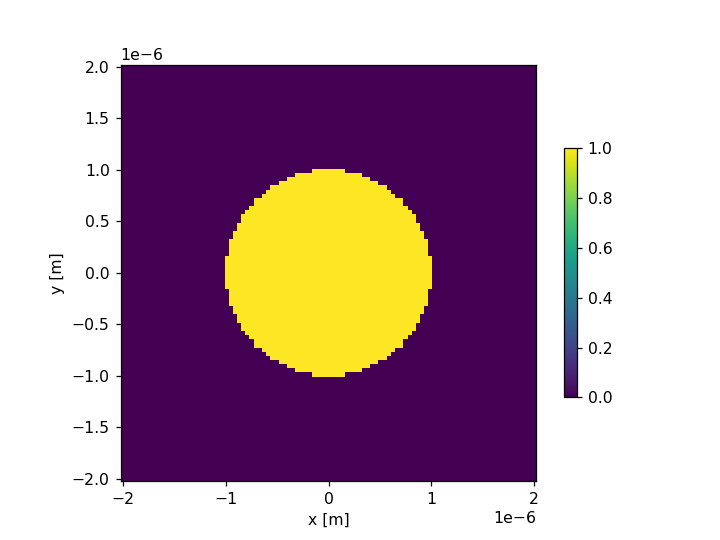

In [3]:
# Make circular apertures (returns also the 2D array)

wavelength = 400e-9 #m
zdist = 100*wavelength #m
 
pixsize = 0.1 * wavelength
x_pixel = 100
y_pixel = 100
 
aperture_width  = x_pixel*pixsize
aperture_height = y_pixel*pixsize

radius = 1000e-9 #m 

# Define Aperture
aperture = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel)

# Populate Aperture from phase mask 
mask = moe.generate.circular_aperture(aperture, radius=radius)

# Define Phase mask 
mask_phase = moe.generate.create_empty_aperture_from_aperture(aperture)
mask_phase.aperture = mask.aperture*np.pi


# Plot the circular mask
moe.plotting.plot_aperture(mask)


<IPython.core.display.Javascript object>


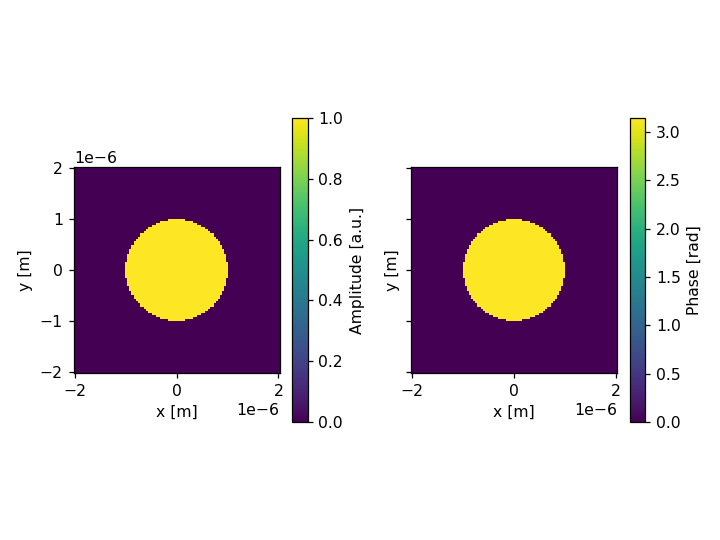

In [4]:
# Calculates a field to use with the calculated mask

# Initialize a Field from the Aperture mask 
field = moe.field.create_empty_field_from_aperture(mask)

# Generate a uniform field
field = moe.field.generate_uniform_field(field, E0=1)

# Or Gaussian field is also available 
#field = moe.field.generate_gaussian_field(field, E0=1, w0=100*micro)

# Modulates the field with a given aperture that can be used either as an amplitude mask or a phase mask
field = moe.field.modulate_field(field, amplitude_mask=mask, phase_mask=mask_phase)

# Plots the field (amplitude and phase)
moe.plotting.plot_field(field)

plt.tight_layout()
plt.show()

[########################################] | 100% Completed | 24.2s


<IPython.core.display.Javascript object>


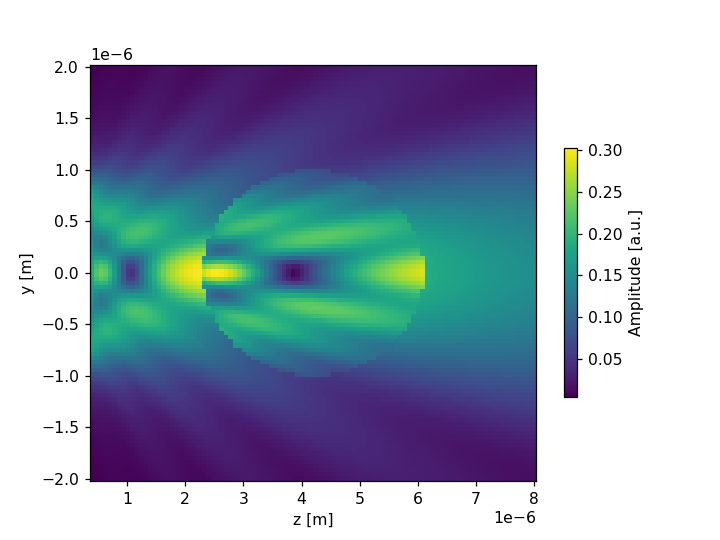

<IPython.core.display.Javascript object>


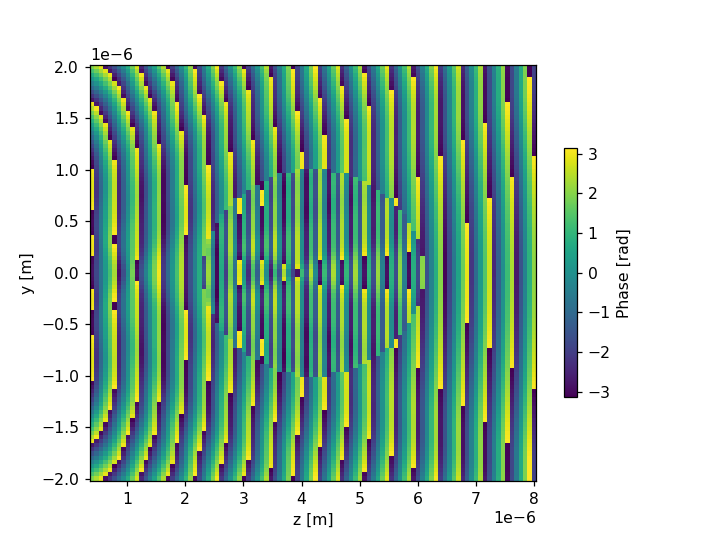

In [5]:
### Make a refractive index circle in the middles of the propagation path 

####Propagate field and calculate in plane YZ, using npix bins in Y
zmin = wavelength
zmax = 0.2*zdist
nzs = 100

# Creates a screen in YZ plane with [-aperture_height/2, aperture_height/2] and [zmin, zmax] and 
screen_YZ = moe.field.create_screen_YZ(-aperture_height/2, aperture_height/2, y_pixel, 
                                        zmin, zmax, nzs,
                                        x=0)

screen_YZ_n = np.ones(screen_YZ.shape)
screen_YZ_n.shape, field.shape, screen_YZ.amplitude.shape

screen_YZ_n[:,0,:] = field.amplitude+1

screen_YZ.n[50,0,50]
screen_YZ_n[:,0,:]

# Propagate the field 
E_YZ = moe.propagate.RS_integral(field, screen_YZ,  wavelength, n=screen_YZ_n, simp2d=True)

#Plot the amplitude of the propagated field in yz screen
moe.plotting.plot_screen_YZ(E_YZ, which='amplitude')
plt.show()

#Plot the phase of the propagated field in yz screen
moe.plotting.plot_screen_YZ(E_YZ, which='phase')
plt.show()

In [6]:
# Propagate the field 
E_YZ = moe.propagate.RS_integral(field, screen_YZ,  wavelength, n=screen_YZ_n, simp2d=True)

[########################################] | 100% Completed | 20.0s


<IPython.core.display.Javascript object>


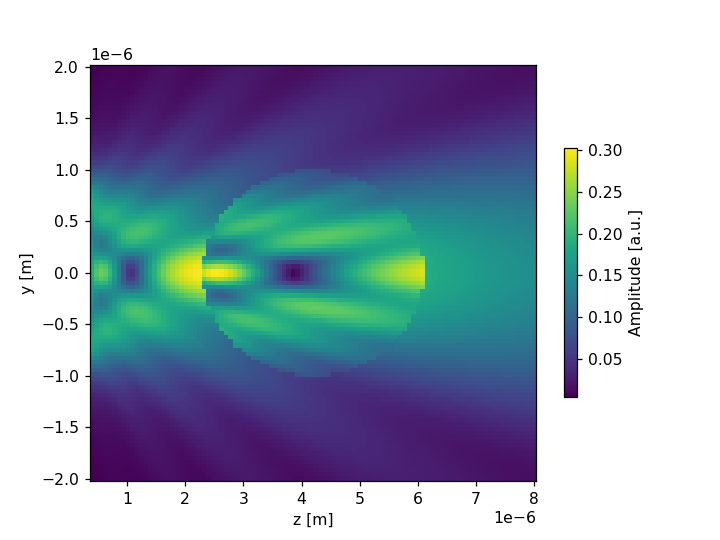

<IPython.core.display.Javascript object>


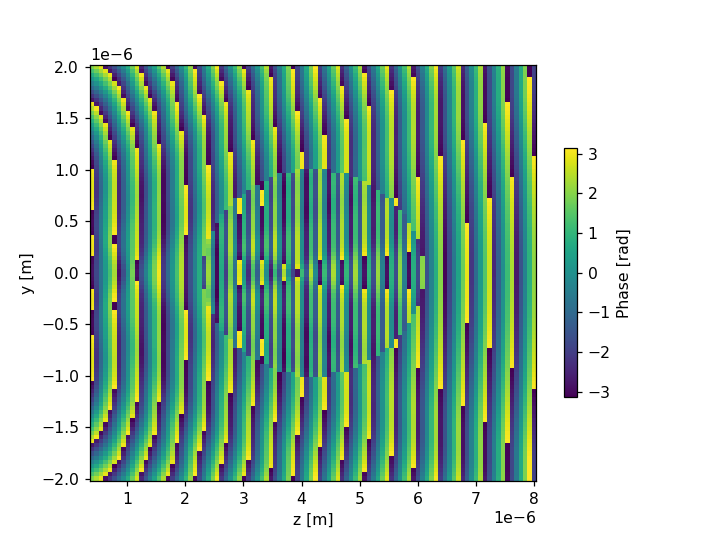

In [7]:
#Plot the amplitude of the propagated field in yz screen
moe.plotting.plot_screen_YZ(E_YZ, which='amplitude')
plt.show()

#Plot the phase of the propagated field in yz screen
moe.plotting.plot_screen_YZ(E_YZ, which='phase')
plt.show()

<IPython.core.display.Javascript object>


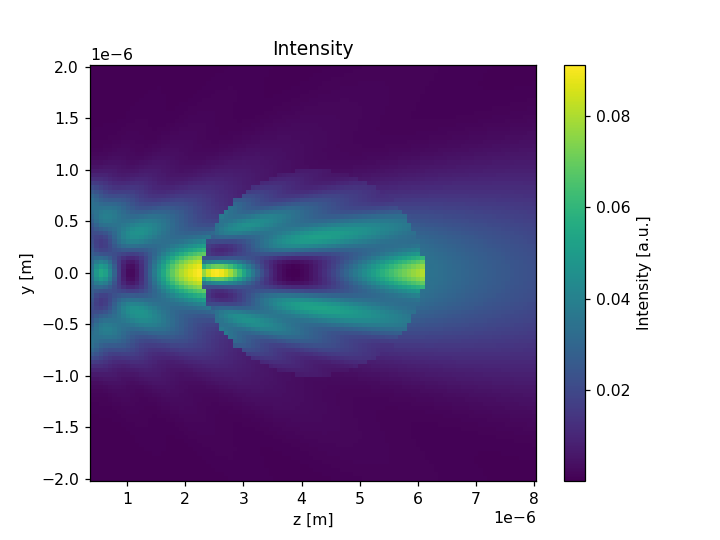

In [8]:
###Plot intensity in the YZ screen
I_YZ= E_YZ 
I_YZ.screen= np.abs(E_YZ.amplitude)**2 ## careful with multiple assertions this way

moe.plotting.plot_screen_YZ(I_YZ, which='amplitude', colorbar=False)
plt.colorbar(label='Intensity [a.u.]')
plt.title("Intensity")
plt.show()

<IPython.core.display.Javascript object>


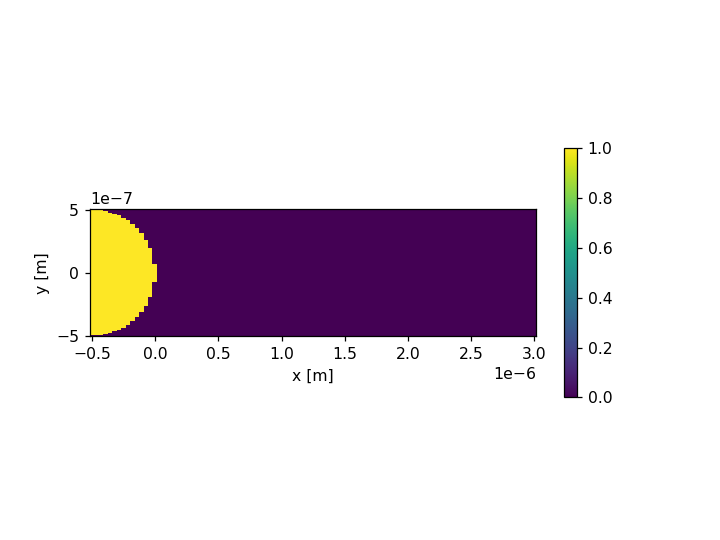

<IPython.core.display.Javascript object>


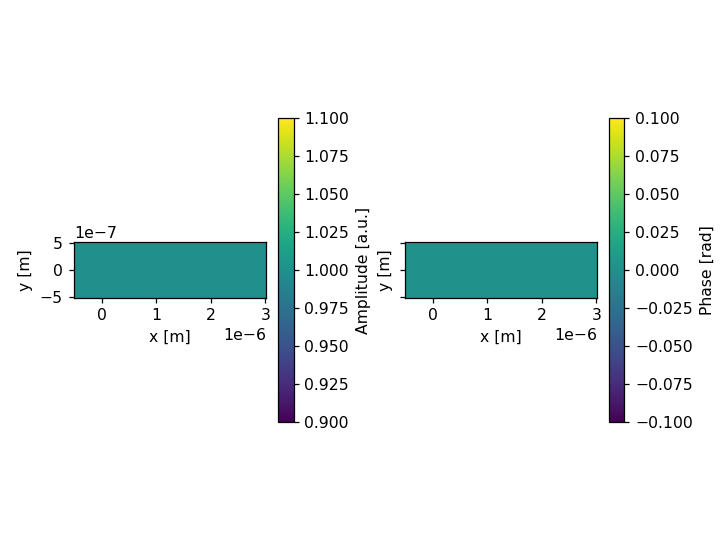

1.0
[########################################] | 100% Completed | 19.5s


<IPython.core.display.Javascript object>


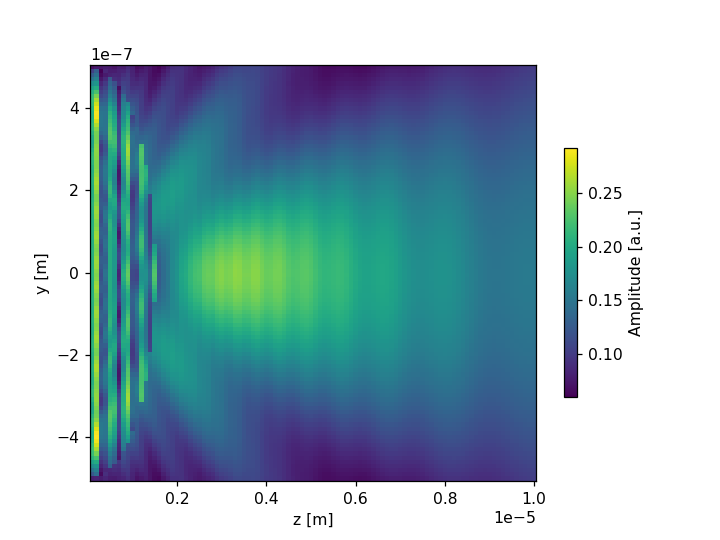

<IPython.core.display.Javascript object>


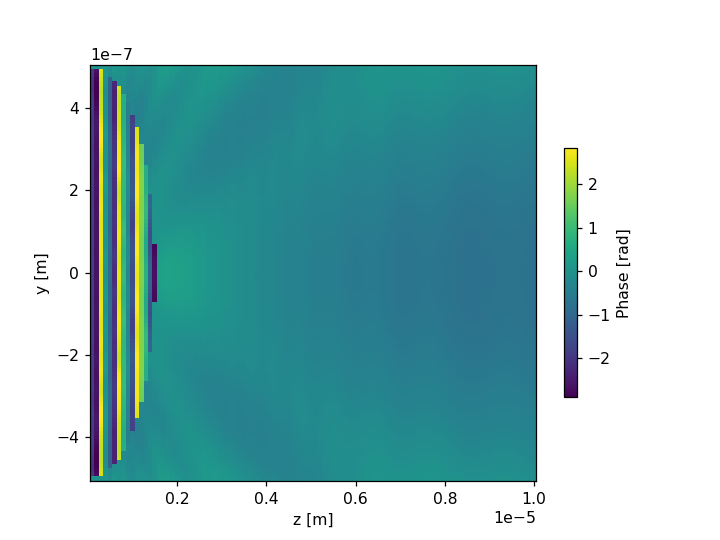

In [9]:
# Make the circular refractive object at the beggining of the propagation path 

wavelength = 100e-9 #m
zdist = 100*wavelength #m
 
pixsize = 0.1 * wavelength
x_pixel = 100
y_pixel = 100
 
aperture_width  = x_pixel*pixsize
aperture_height = y_pixel*pixsize

radius = 1000e-9 #m 

aperture = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width*3, x_pixel,\
                                              -aperture_height/2, aperture_height/2, y_pixel)

# Populate Aperture from phase mask 
mask = moe.generate.circular_aperture(aperture, radius=aperture_height/2, center=(-aperture_width/2, 0))
#np.transpose(mask.aperture)[0:50] =0
np.transpose(mask.aperture)[mask.y>0] =0


#define a circular object with n=1.5 
circular_object = moe.generate.create_empty_aperture_from_aperture(aperture)
circular_object.aperture = (mask.aperture+1)-mask.aperture*0.5

nindex_circle= circular_object.aperture

moe.plotting.plot_aperture(mask)



# Initialize a Field from the Aperture mask 
field = moe.field.create_empty_field_from_aperture(mask)

# Generate a uniform field
field = moe.field.generate_uniform_field(field, E0=1)

# Plots the field (amplitude and phase)
moe.plotting.plot_field(field)

plt.tight_layout()
plt.show()

####Propagate field and calculate in plane YZ, using npix bins in Y
zmin = wavelength
zmax = 1*zdist
nzs = x_pixel


# Creates a screen in YZ plane with [-aperture_height/2, aperture_height/2] and [zmin, zmax] and 
screen_YZ = moe.field.create_screen_YZ(-aperture_height*1/2, aperture_height*1/2, y_pixel, 
                                        zmin, zmax, nzs,
                                        x=0)

screen_YZ_n = np.ones(screen_YZ.shape)
screen_YZ_n.shape, field.shape, screen_YZ.amplitude.shape

screen_YZ_n[:,0,:] = nindex_circle

print(screen_YZ.n[50,0,50])


# Propagate the field 
E_YZ = moe.propagate.RS_integral(field, screen_YZ,  wavelength, n=screen_YZ_n, simp2d=True)

#Plot the amplitude of the propagated field in yz screen
moe.plotting.plot_screen_YZ(E_YZ, which='amplitude')
plt.show()

#Plot the phase of the propagated field in yz screen
moe.plotting.plot_screen_YZ(E_YZ, which='phase')
plt.show()

<IPython.core.display.Javascript object>


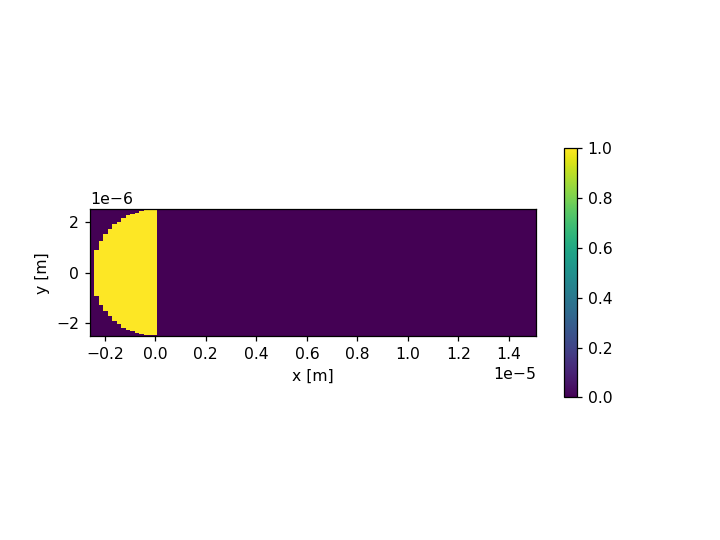

<IPython.core.display.Javascript object>


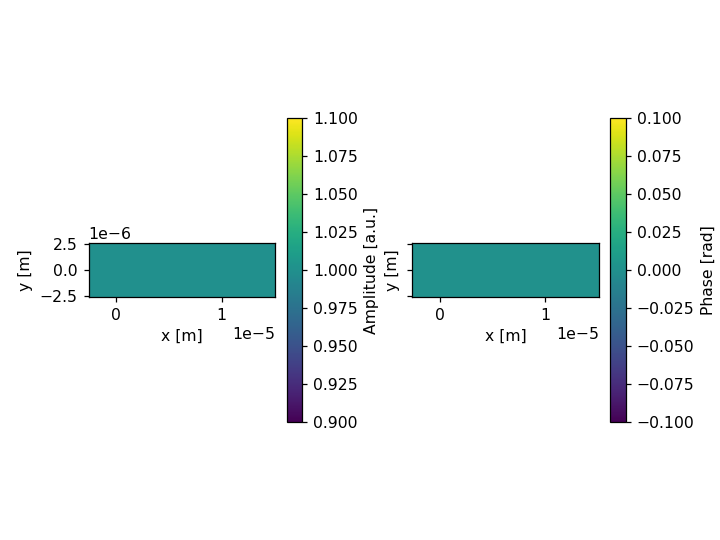

1.0
[########################################] | 100% Completed | 19.8s


<IPython.core.display.Javascript object>


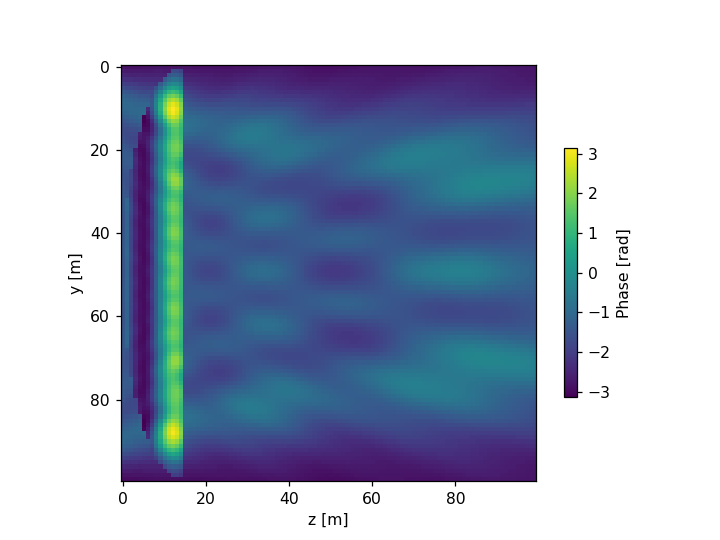

<IPython.core.display.Javascript object>


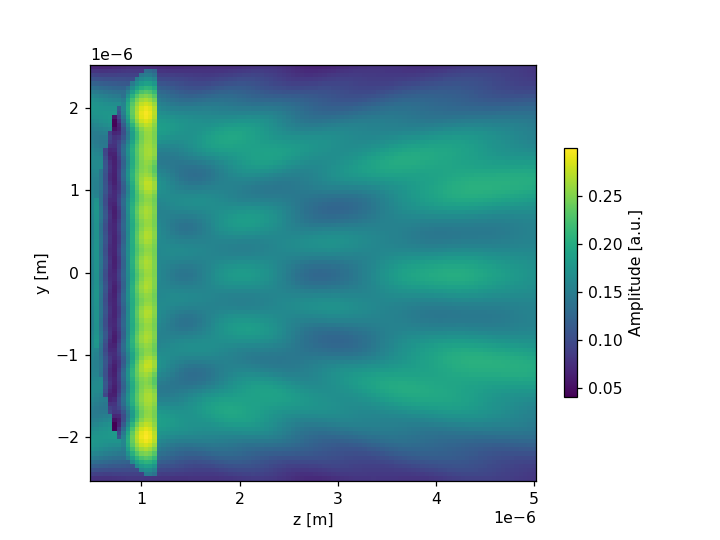

[########################################] | 100% Completed | 19.0s


<IPython.core.display.Javascript object>


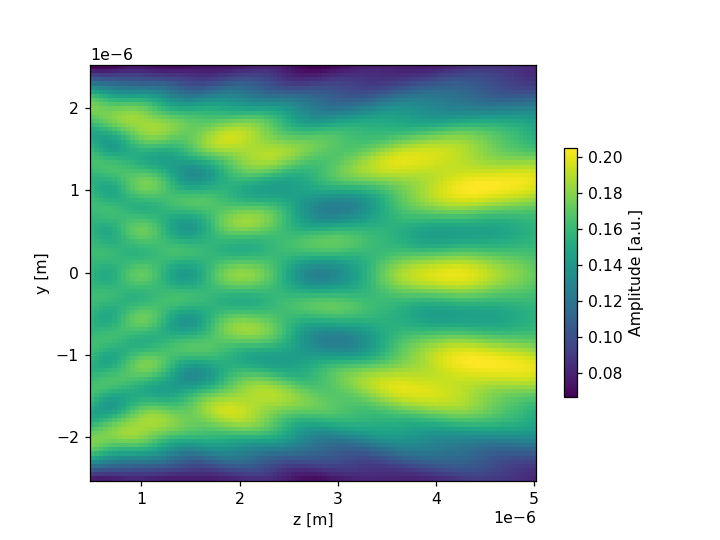

In [10]:
# Make the circular refractive object at the beggining of the propagation path 


wavelength = 500e-9 #m
zdist = 100*wavelength #m
 
pixsize = 0.1 * wavelength
x_pixel = 100
y_pixel = 100
 
aperture_width  = x_pixel*pixsize
aperture_height = y_pixel*pixsize

radius = 5e-6 #m 

aperture = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width*3, x_pixel,\
                                              -aperture_height/2, aperture_height/2, y_pixel)

# Populate Aperture from phase mask 
mask = moe.generate.circular_aperture(aperture, radius=aperture_height/2, center=(0, 0))
#np.transpose(mask.aperture)[0:50] =0
np.transpose(mask.aperture)[mask.x>0] =0


#define a circular object with n=1.5 
circular_object = moe.generate.create_empty_aperture_from_aperture(aperture)
circular_object.aperture = (mask.aperture+1)-mask.aperture*0.5

nindex_circle= circular_object.aperture

moe.plotting.plot_aperture(mask)



# Initialize a Field from the Aperture mask 
field = moe.field.create_empty_field_from_aperture(mask)

# Generate a uniform field
field = moe.field.generate_uniform_field(field, E0=1)

# Plots the field (amplitude and phase)
moe.plotting.plot_field(field)

plt.tight_layout()
plt.show()

####Propagate field and calculate in plane YZ, using npix bins in Y
zmin = wavelength
zmax = radius
nzs = x_pixel


# Creates a screen in YZ plane with [-aperture_height/2, aperture_height/2] and [zmin, zmax] and 
screen_YZ = moe.field.create_screen_YZ(-aperture_height*1/2, aperture_height*1/2, y_pixel, 
                                        zmin, zmax, nzs,
                                        x=0)

screen_YZ_n = np.ones(screen_YZ.shape)
screen_YZ_n.shape, field.shape, screen_YZ.amplitude.shape

screen_YZ_n[:,0,:] = nindex_circle

print(screen_YZ.n[50,0,50])


# Propagate the field 
E_YZ = moe.propagate.RS_integral(field, screen_YZ,  wavelength, n=screen_YZ_n, simp2d=True)



#Plot the phase of the propagated field in yz screen
moe.plotting.plot_screen_YZ(E_YZ, which='phase')
plt.show()

plt.imshow(np.abs(E_YZ.amplitude[:,0,:])**2)
plt.show()

#Plot the amplitude of the propagated field in yz screen
moe.plotting.plot_screen_YZ(E_YZ, which='amplitude')
plt.show()


# Propagate the field 
E_YZ = moe.propagate.RS_integral(field, screen_YZ,  wavelength, simp2d=True)

#Plot the amplitude of the propagated field in yz screen
moe.plotting.plot_screen_YZ(E_YZ, which='amplitude')
plt.show()

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


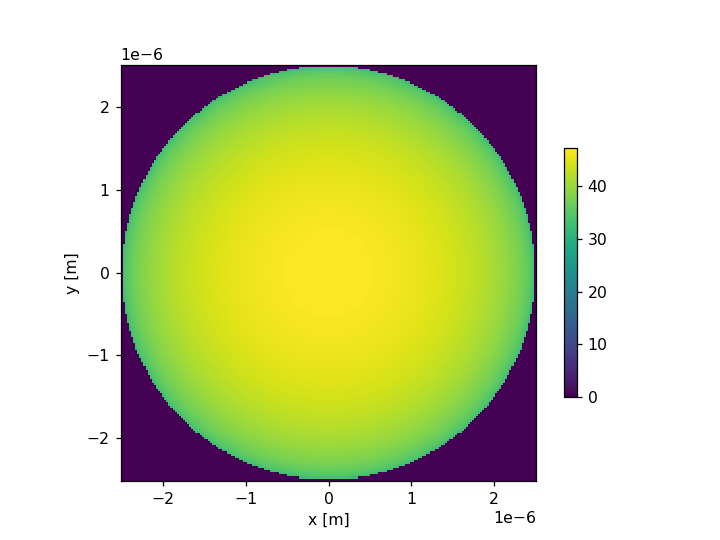

../..\pyMOE\plotting.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


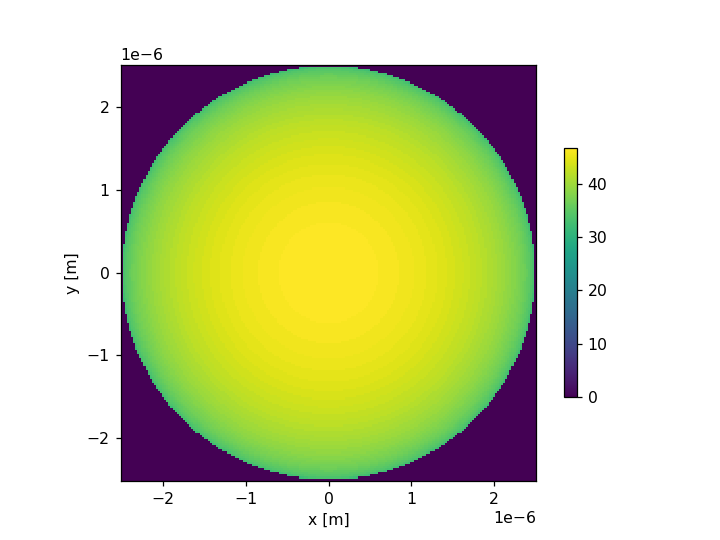

<IPython.core.display.Javascript object>


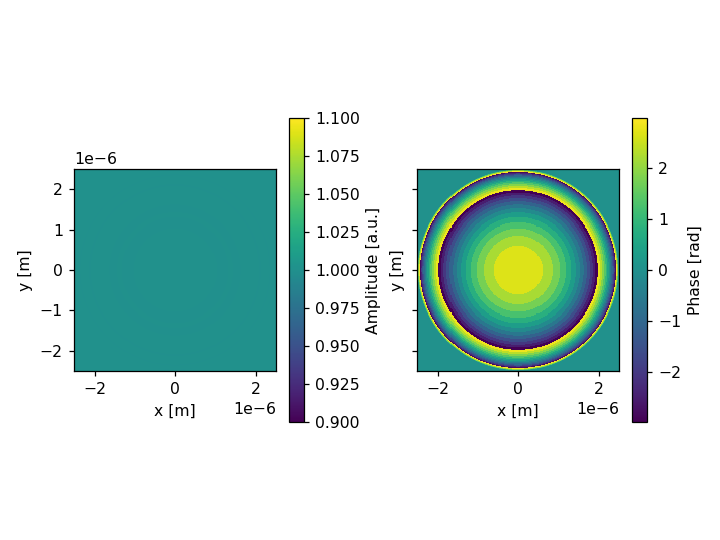

[########################################] | 100% Completed |  3min 37.7s


<IPython.core.display.Javascript object>


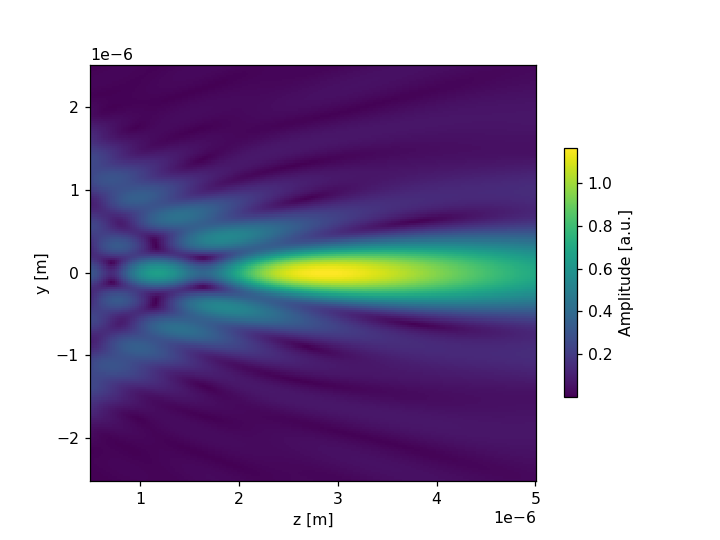

In [17]:
### Emulate the hemispherical object as being a 2D mask and apply RS propagation instead 
### Reproducing  https://doi.org/10.1364/JOSAB.36.001031 Figure 2a 

#attention, make sure to have enough pixels 
npix = 200  # number of pixels 
xsiz = 5e-6 #x-size 
ysiz = 5e-6 #y-size 



def hemisphere(x,y,rad, k,wavelength, n1,no, center=(0,0)):
    """
    The hemisphere is defined as 
    """
    func = np.sqrt(rad**2-(x-center[0])**2-(y-center[0])**2)
    
    func = func *2*np.pi*n1/(wavelength) + (rad-func)*2*np.pi/(wavelength)
    func[rad**2<((x-center[0])**2+(y-center[0])**2)] =0
    return func


n =100 # number of gray levels 

nind = 1.5

wavelength = 0.5e-6

k = 2*np.pi/(wavelength*nind)


center = (0, 0)

aperture = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, \
                                              -ysiz/2, ysiz/2, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, \
                                                 hemisphere,\
                                                 rad = 2.5e-6, k=0,\
                                                wavelength=wavelength, n1=1.5,\
                                                no=1)
moe.plotting.plot_aperture(mask)


mask.discretize(n)
moe.plotting.plot_aperture(mask) 

# Calculates a field to use with the calculated mask

# Initialize a Field from the Aperture mask 
field = moe.field.create_empty_field_from_aperture(mask)

# Generate a uniform field
field = moe.field.generate_uniform_field(field, E0=1)

# Or Gaussian field is also available 
#field = moe.field.generate_gaussian_field(field, E0=1, w0=100*micro)

# Modulates the field with a given aperture that can be used either as an amplitude mask or a phase mask
field = moe.field.modulate_field(field, amplitude_mask=None, phase_mask=mask)

# Plots the field (amplitude and phase)
moe.plotting.plot_field(field)

plt.tight_layout()
plt.show()

####Propagate field and calculate in plane YZ, using npix bins in Y
zmin = wavelength
zmax = 5e-6
nzs = npix

# Creates a screen in YZ plane with [-aperture_height/2, aperture_height/2] and [zmin, zmax] and 
screen_YZ = moe.field.create_screen_YZ(-ysiz/2, ysiz/2, npix, 
                                        zmin, zmax, nzs,
                                        x=0)


# Propagate the field 
E_YZ = moe.propagate.RS_integral(field, screen_YZ,  wavelength, simp2d=True)

#Plot the amplitude of the propagated field in yz screen
moe.plotting.plot_screen_YZ(E_YZ, which='amplitude')
plt.show()

<IPython.core.display.Javascript object>


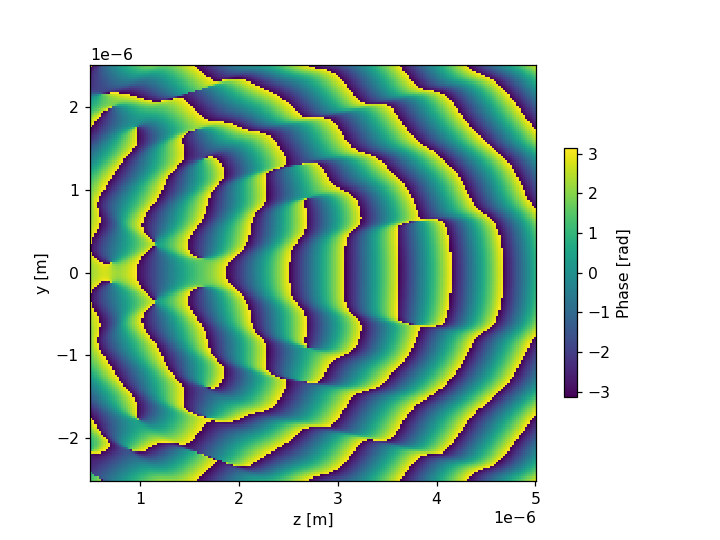

In [18]:
#Plot the phase of the propagated field in yz screen
moe.plotting.plot_screen_YZ(E_YZ, which='phase')
plt.show()

<IPython.core.display.Javascript object>


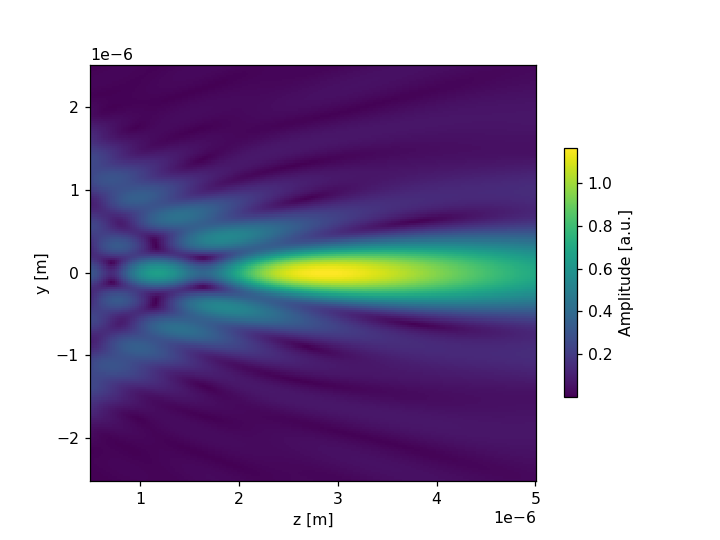

<IPython.core.display.Javascript object>


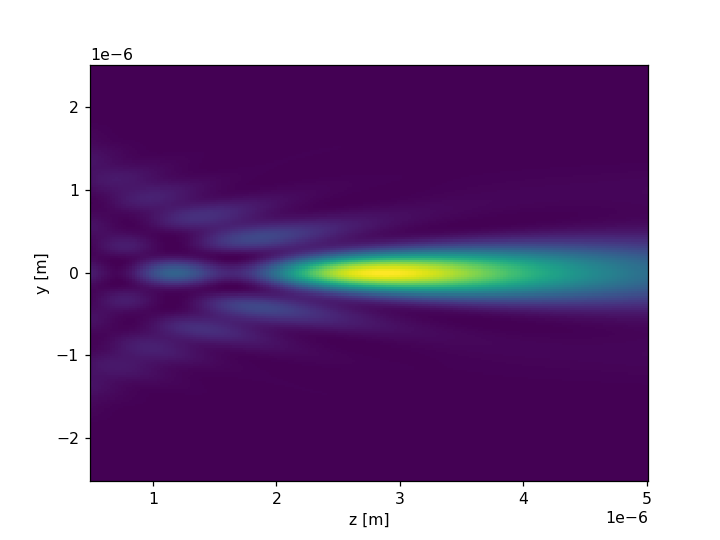

<IPython.core.display.Javascript object>


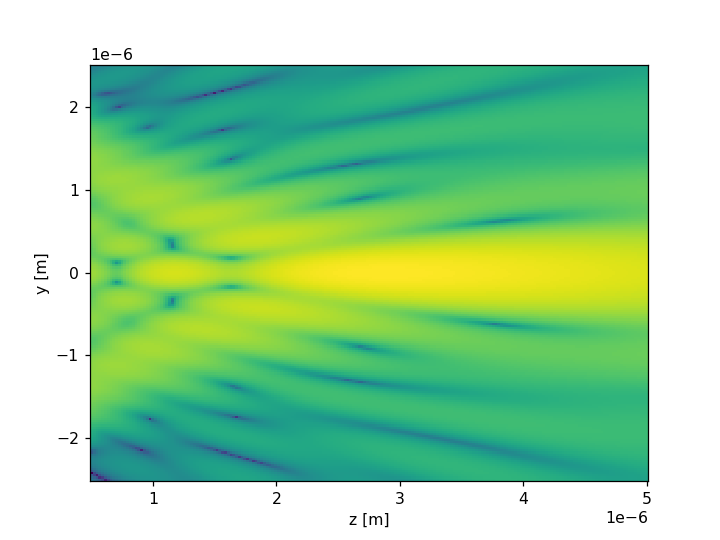

In [23]:
#Plot the amplitude of the propagated field in yz screen
moe.plotting.plot_screen_YZ(E_YZ, which='amplitude')
plt.show()

#Plot the amplitude of the propagated field in yz screen
fig = plt.figure() 
plt.pcolormesh( np.linspace(zmin,zmax,nzs),aperture.y, np.abs(E_YZ.amplitude[:,0,:])**2)
plt.xlabel("z [m]")
plt.ylabel("y [m]")
plt.show()

#Plot the amplitude of the propagated field in yz screen
fig = plt.figure() 
plt.pcolormesh(np.linspace(zmin,zmax,nzs), aperture.y, np.log10(np.abs(E_YZ.amplitude[:,0,:])**2))
plt.xlabel("z [m]")
plt.ylabel("y [m]")
plt.show()

<IPython.core.display.Javascript object>


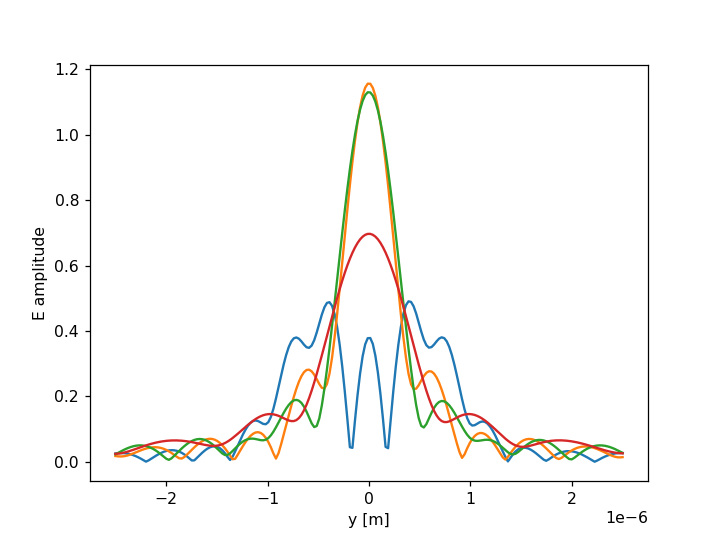

(5.527638190954773e-07, 6.030150753768841e-07, 9.045226130653263e-07)

In [29]:
fig = plt.figure() 

plt.plot(aperture.y, E_YZ.amplitude[:,0,50])
plt.plot(aperture.y, E_YZ.amplitude[:,0,100])
plt.plot(aperture.y, E_YZ.amplitude[:,0,120])
plt.plot(aperture.y, E_YZ.amplitude[:,0,199])
plt.xlabel("y [m]")
plt.ylabel("E amplitude")

def FWHM(X,Y):
    half_max = max(Y) / 2.
    #find when function crosses line half_max (when sign of diff flips)
    #take the 'derivative' of signum(half_max - Y[])
    d = np.sign(half_max - np.array(Y[0:-1])) - np.sign(half_max - np.array(Y[1:]))
    #plot(X[0:len(d)],d) #if you are interested
    #find the left and right most indexes
    left_idx = np.where(d > 0)[0]
    right_idx = np.where(d < 0)[-1]
    return X[right_idx] - X[left_idx] #return the difference (full width)

val1 = FWHM(aperture.y, E_YZ.amplitude[:,0,100])[0]
val2 = FWHM(aperture.y, E_YZ.amplitude[:,0,120])[0]
val3 = FWHM(aperture.y, E_YZ.amplitude[:,0,199])[0]

val1, val2, val3

<IPython.core.display.Javascript object>


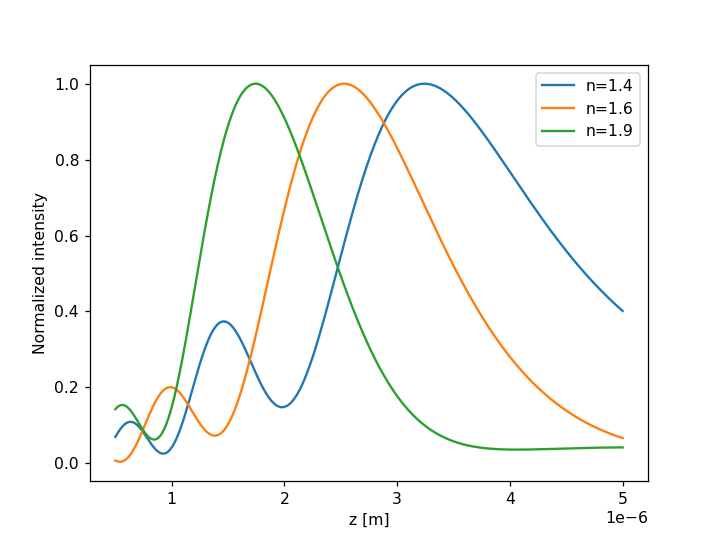

[                                        ] | 0% Completed |  0.0s

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt


[########################################] | 100% Completed | 25.4s
[########################################] | 100% Completed | 24.9s
[########################################] | 100% Completed | 25.2s


Text(0, 0.5, 'Normalized intensity')

In [16]:
### Salhi 2019 JOSAB https://doi.org/10.1364/JOSAB.36.001031 
##Image 4a

wavelength = 0.5e-6

radius = 5*wavelength

zmin = wavelength
zmax = 2*radius
nzs = npix

npix = 500  # number of pixels 

xsiz = 2*radius #x-size 
ysiz = 2*radius #y-size 

center = (0, 0)

n =100 # number of gray levels 

def hemisphere(x,y,rad, wavelength, n1,no, center=(0,0)):
    """
    The hemisphere is defined as 
    """
    func = np.sqrt(rad**2-(x-center[0])**2-(y-center[0])**2)
    
    func = func *2*np.pi*n1/(wavelength) + (rad-func)*2*np.pi/(wavelength)
    func[rad**2<((x-center[0])**2+(y-center[0])**2)] =0
    return func



fig = plt.figure()

for nind in [1.4,1.6,1.9]:
    k = 2*np.pi/(wavelength*nind)


    aperture = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, \
                                                  -ysiz/2, ysiz/2, npix,)
    mask =  moe.generate.arbitrary_aperture_function(aperture, \
                                                     hemisphere,\
                                                     rad = radius, \
                                                    wavelength=wavelength, n1=nind,\
                                                    no=1)

    mask.discretize(n)

    # Calculates a field to use with the calculated mask

    # Initialize a Field from the Aperture mask 
    field = moe.field.create_empty_field_from_aperture(mask)

    # Generate a uniform field
    field = moe.field.generate_uniform_field(field, E0=1)

    # Or Gaussian field is also available 
    #field = moe.field.generate_gaussian_field(field, E0=1, w0=100*micro)

    # Modulates the field with a given aperture that can be used either as an amplitude mask or a phase mask
    field = moe.field.modulate_field(field, amplitude_mask=None, phase_mask=mask)


    screen_ZZ = moe.field.create_screen_ZZ(zmin, zmax, nzs)
    E_ZZ = moe.propagate.RS_integral(field, screen_ZZ, wavelength, parallel_computing=True)

    #moe.plotting.plot_screen_ZZ(E_ZZ, which='amplitude')
    plt.plot(np.linspace(zmin,zmax,nzs), np.abs(E_ZZ.amplitude[0,0,:])**2/np.max(np.abs(E_ZZ.amplitude[0,0,:])**2),\
            label="n="+str(nind) )
    
plt.legend()
plt.xlabel("z [m]")
plt.ylabel("Normalized intensity")

<IPython.core.display.Javascript object>


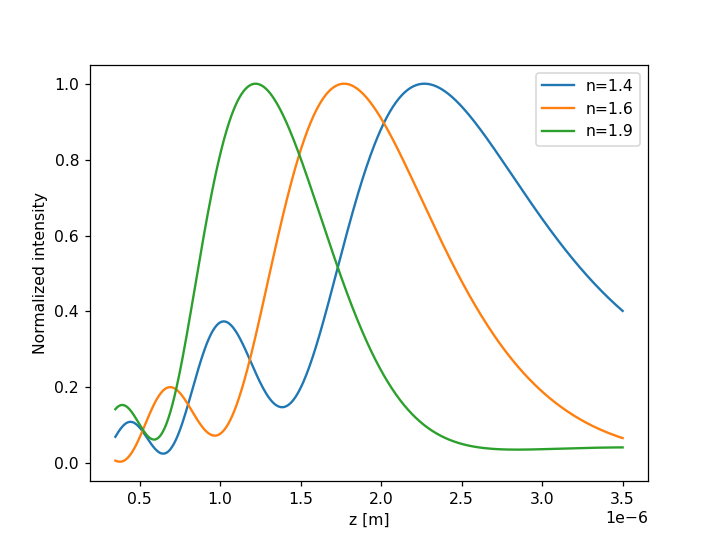

[                                        ] | 0% Completed |  0.0s

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


[########################################] | 100% Completed | 24.4s
[########################################] | 100% Completed | 22.8s
[########################################] | 100% Completed | 20.7s


Text(0, 0.5, 'Normalized intensity')

In [32]:


wavelength = 0.35e-6

radius = 5*wavelength

zmin = wavelength
zmax = 2*radius
nzs = npix

npix = 500  # number of pixels 

xsiz = 2*radius #x-size 
ysiz = 2*radius #y-size 

center = (0, 0)

n =100 # number of gray levels 

def hemisphere(x,y,rad,wavelength, n1,no, center=(0,0)):
    """
    The hemisphere is defined as 
    """
    func = np.sqrt(rad**2-(x-center[0])**2-(y-center[0])**2)
    
    func = func *2*np.pi*n1/(wavelength) + (rad-func)*2*np.pi/(wavelength)
    func[rad**2<((x-center[0])**2+(y-center[0])**2)] =0
    return func



fig = plt.figure()

for nind in [1.4,1.6,1.9]:
    k = 2*np.pi/(wavelength*nind)


    aperture = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, \
                                                  -ysiz/2, ysiz/2, npix,)
    mask =  moe.generate.arbitrary_aperture_function(aperture, \
                                                     hemisphere,\
                                                     rad = radius, \
                                                    wavelength=wavelength, n1=nind,\
                                                    no=1)

    mask.discretize(n)

    # Calculates a field to use with the calculated mask

    # Initialize a Field from the Aperture mask 
    field = moe.field.create_empty_field_from_aperture(mask)

    # Generate a uniform field
    field = moe.field.generate_uniform_field(field, E0=1)

    # Or Gaussian field is also available 
    #field = moe.field.generate_gaussian_field(field, E0=1, w0=100*micro)

    # Modulates the field with a given aperture that can be used either as an amplitude mask or a phase mask
    field = moe.field.modulate_field(field, amplitude_mask=None, phase_mask=mask)


    screen_ZZ = moe.field.create_screen_ZZ(zmin, zmax, nzs)
    E_ZZ = moe.propagate.RS_integral(field, screen_ZZ, wavelength, parallel_computing=True)

    #moe.plotting.plot_screen_ZZ(E_ZZ, which='amplitude')
    plt.plot(np.linspace(zmin,zmax,nzs), np.abs(E_ZZ.amplitude[0,0,:])**2/np.max(np.abs(E_ZZ.amplitude[0,0,:])**2),\
            label="n="+str(nind) )
    
plt.legend()
plt.xlabel("z [m]")
plt.ylabel("Normalized intensity")